In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
#path of example directory
path = "/content/drive/MyDrive/Colab Notebooks/"

In [10]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import math
import glob
from PIL import Image 
from IPython.display import Image
%matplotlib inline

# Read image
img = cv2.imread(path+'Coins.jpg')
hh, ww = img.shape[:2]

# Convert to grayscale
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

# Gaussian filter
gray = cv2.GaussianBlur(gray, ksize=(7,7), sigmaX=0, sigmaY=0)

# get canny edges
canny = cv2.Canny(gray, 150, 200)

# get Hough circles
min_dist = int(ww/20)
circles = cv2.HoughCircles(canny, cv2.HOUGH_GRADIENT, 1, minDist=min_dist, param1=118, param2=8, minRadius=0, maxRadius=0)
print(type(circles))

circles = np.uint16(np.around(circles))
for i in circles[0,:]:
# draw the outer circle
  cv2.circle(img,(i[0],i[1]),i[2],(0,255,0),1)
# draw the center of the circle
  cv2.circle(img,(i[0],i[1]),2,(0,0,255),1)

<class 'numpy.ndarray'>


Total available circle is 3


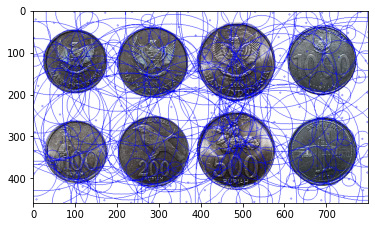

In [15]:
# draw circles
result = img.copy()
for circle in circles[0]:
    # draw the circle in the output image
    (x,y,r) = circle
    x = int(x)
    y = int(y)
    r = int(r)
    cv2.circle(result, (x, y), r, (0, 0, 255), 1)

# save results
cv2.imwrite('coin_canny.jpg', canny)
cv2.imwrite('coin_circle2.jpg', result)

# show images
plt.imshow(gray)
plt.imshow(canny)
plt.imshow(result)

print('Total available circle is', len(circle)) 